In [19]:
#import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#new
from torch.utils.data import DataLoader

In [20]:
#import dataset
import seaborn as sns
iris = sns.load_dataset('iris')

#convert from pandas  dataFrame to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

#transform species to number
labels = torch.zeros(len(data),dtype= torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

# using dataLoader

In [21]:
# create our fake dataset

fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata), print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [22]:
#dataloader object with all data
fakedataLdr = DataLoader(fakedata,shuffle=True)
print(fakedataLdr)
print(fakedataLdr.batch_size)

1


In [23]:
#iterate through the data
for i , oneSample in enumerate(fakedataLdr):
    print(i,oneSample,oneSample.shape)

0 tensor([[21, 22, 23, 24]]) torch.Size([1, 4])
1 tensor([[51, 52, 53, 54]]) torch.Size([1, 4])
2 tensor([[91, 92, 93, 94]]) torch.Size([1, 4])
3 tensor([[101, 102, 103, 104]]) torch.Size([1, 4])
4 tensor([[41, 42, 43, 44]]) torch.Size([1, 4])
5 tensor([[31, 32, 33, 34]]) torch.Size([1, 4])
6 tensor([[81, 82, 83, 84]]) torch.Size([1, 4])
7 tensor([[71, 72, 73, 74]]) torch.Size([1, 4])
8 tensor([[61, 62, 63, 64]]) torch.Size([1, 4])
9 tensor([[11, 12, 13, 14]]) torch.Size([1, 4])


In [24]:
# we need to create a dataset that contains the data and labels

fakeDataset =  torch.utils.data.TensorDataset(torch.Tensor(fakedata),torch.Tensor(fakelabels))
print(fakeDataset.tensors),print(' ')

# the create another dataloader
fakedataLdr = DataLoader(fakeDataset,shuffle=True)

#iterate through the data
for dat,lab in fakedataLdr:
    print(dat,lab)

(tensor([[ 11.,  12.,  13.,  14.],
        [ 21.,  22.,  23.,  24.],
        [ 31.,  32.,  33.,  34.],
        [ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 61.,  62.,  63.,  64.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [ 91.,  92.,  93.,  94.],
        [101., 102., 103., 104.]]), tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))
 
tensor([[21., 22., 23., 24.]]) tensor([0.])
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[71., 72., 73., 74.]]) tensor([1.])
tensor([[51., 52., 53., 54.]]) tensor([0.])
tensor([[61., 62., 63., 64.]]) tensor([1.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[31., 32., 33., 34.]]) tensor([0.])
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[11., 12., 13., 14.]]) tensor([0.])
tensor([[81., 82., 83., 84.]]) tensor([1.])


In [25]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(fakedata, fakelabels, test_size=.2)

# then convert them into PyTorch Datasets
train_data = torch.utils.data.TensorDataset(
     torch.Tensor(train_data),torch.Tensor(train_labels))

test_data = torch.utils.data.TensorDataset(
     torch.Tensor(test_data),torch.Tensor(test_labels))

# finally, translate into dataloader objects
# notice the batches (see next cell)!
train_loader = DataLoader(train_data,batch_size=4)
test_loader  = DataLoader(test_data)

In [26]:
#examine the contents of the dataloader (batching is an advantage of dataloader)

print('TRAINING DATA')
for batch,label in train_loader:
    print(batch,label)
    print(' ')

print(' ')
print('Testing Data')
for batch,label in test_loader:
    print(batch,label)
    print(' ')


TRAINING DATA
tensor([[91., 92., 93., 94.],
        [41., 42., 43., 44.],
        [51., 52., 53., 54.],
        [21., 22., 23., 24.]]) tensor([1., 0., 0., 0.])
 
tensor([[ 11.,  12.,  13.,  14.],
        [101., 102., 103., 104.],
        [ 81.,  82.,  83.,  84.],
        [ 71.,  72.,  73.,  74.]]) tensor([0., 1., 1., 1.])
 
 
Testing Data
tensor([[61., 62., 63., 64.]]) tensor([1.])
 
tensor([[31., 32., 33., 34.]]) tensor([0.])
 


# Now back to the real data

In [27]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = \
                              train_test_split(data, labels, train_size=.8)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
train_loader = DataLoader(train_data,shuffle=True,batch_size=12)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [28]:
# check sizes of data batches
for X,y in train_loader:
  print(X.shape,y.shape)

X,y

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


(tensor([[5.1000, 3.8000, 1.6000, 0.2000],
         [7.7000, 2.6000, 6.9000, 2.3000],
         [6.2000, 2.9000, 4.3000, 1.3000],
         [4.8000, 3.1000, 1.6000, 0.2000],
         [5.0000, 3.4000, 1.6000, 0.4000],
         [5.9000, 3.0000, 4.2000, 1.5000],
         [6.4000, 2.9000, 4.3000, 1.3000],
         [6.5000, 2.8000, 4.6000, 1.5000],
         [6.8000, 3.0000, 5.5000, 2.1000],
         [6.0000, 2.2000, 5.0000, 1.5000],
         [5.7000, 2.8000, 4.5000, 1.3000],
         [5.4000, 3.0000, 4.5000, 1.5000]]),
 tensor([0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1]))

In [29]:
# a function that creates the ANN model

def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return ANNiris,lossfun,optimizer

In [30]:
# train the model

# global parameter
numepochs = 500

def trainTheModel():

  # initialize accuracies as empties (not storing losses here)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):


    # loop over training data batches
    batchAcc = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNiris(X)
      loss = lossfun(yHat,y)
      
      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # end of batch loop...


    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANNiris(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )
  
  # function output
  return trainAcc,testAcc

# Modelling

In [33]:
#create a Model
ANNiris,lossfun,optimizer = createANewModel()

#train the Model
trainAcc,testAcc = trainTheModel()


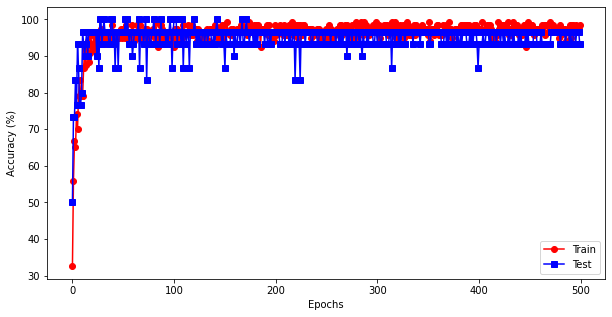

In [34]:
#plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

# optional zoom-in to final epochs
# plt.xlim([300,500])
# plt.ylim([90,100.5])

plt.show()
